## Import Library

In [1]:
import cv2
import os
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

## Load Data

In [2]:
base_dir = 'Facemask Dataset'
categories = os.listdir(base_dir)
labels = [i for i in range (len(categories))]
label_dict = dict(zip(categories, labels))

print(categories)
print(labels)
print(label_dict)

['new_without_mask', 'new_with_mask']
[0, 1]
{'new_without_mask': 0, 'new_with_mask': 1}


## Data Preprocessing

In [3]:
img_size=100
data=[]
target=[]

for category in categories:
    path=os.path.join(base_dir,category)
    img_names=os.listdir(path)
        
    for img_name in img_names:
        img_path=os.path.join(path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e) 

In [4]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target=np_utils.to_categorical(target)

In [5]:
np.save('data',data)
np.save('target',new_target)

In [6]:
data

array([[[[0.60392157],
         [0.60392157],
         [0.6       ],
         ...,
         [0.64313725],
         [0.64313725],
         [0.64705882]],

        [[0.60392157],
         [0.60784314],
         [0.6       ],
         ...,
         [0.64313725],
         [0.63921569],
         [0.63529412]],

        [[0.6       ],
         [0.6       ],
         [0.6       ],
         ...,
         [0.63529412],
         [0.63137255],
         [0.63529412]],

        ...,

        [[0.62352941],
         [0.54509804],
         [0.56862745],
         ...,
         [0.56078431],
         [0.54117647],
         [0.54509804]],

        [[0.58039216],
         [0.50196078],
         [0.55686275],
         ...,
         [0.50196078],
         [0.5254902 ],
         [0.50980392]],

        [[0.58431373],
         [0.55686275],
         [0.58039216],
         ...,
         [0.47058824],
         [0.50196078],
         [0.49411765]]],


       [[[0.53333333],
         [0.53333333],
         [0.52

In [7]:
target

array([0, 0, 0, ..., 1, 1, 1])

## Modelling and compile 

In [15]:
model = Sequential([
    Conv2D(200, (3,3), activation='relu', input_shape=data.shape[1:]),
    MaxPooling2D(2, 2),
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 52900)             0         
                                                                 
 dropout_2 (Dropout)         (None, 52900)            

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Split Data

In [18]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2, random_state=1)

In [19]:
print('Jumlah train_data :', len(train_data))
print('Jumlah train_target :', len(train_target))
print('Jumlah test_data :', len(test_data))
print('Jumlah test_target :', len(test_target))

Jumlah train_data : 8903
Jumlah train_target : 8903
Jumlah test_data : 2226
Jumlah test_target : 2226


## Callback

In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')==1) and (logs.get('val_accuracy')==1):
            print("\nAkurasi telah mencapai nilai maksimal, stop training!")
            self.model.stop_training = True
callbacks = myCallback()

## Training

In [21]:
history=model.fit(train_data,
                  train_target,
                  epochs=10,
                  validation_split=0.2,
                  callbacks=[callbacks]
                  )

Epoch 1/10
223/223 [==============================] - 324s 1s/step - loss: 0.1546 - accuracy: 0.9367 - val_loss: 0.0808 - val_accuracy: 0.9955
Epoch 2/10
223/223 [==============================] - 304s 1s/step - loss: 0.0626 - accuracy: 0.9985 - val_loss: 0.0689 - val_accuracy: 0.9994
Epoch 3/10
223/223 [==============================] - 294s 1s/step - loss: 0.0550 - accuracy: 0.9997 - val_loss: 0.0715 - val_accuracy: 0.9910
Epoch 4/10
223/223 [==============================] - 295s 1s/step - loss: 0.0499 - accuracy: 0.9989 - val_loss: 0.0559 - val_accuracy: 0.9989
Epoch 5/10
223/223 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 1.0000
Akurasi telah mencapai nilai maksimal, stop training!
223/223 [==============================] - 297s 1s/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 1.0000


## Plot Accuracy and Loss 

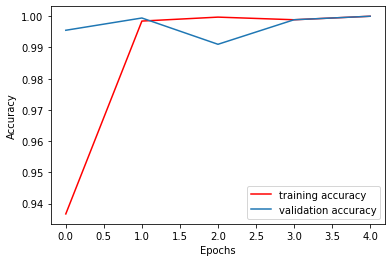

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

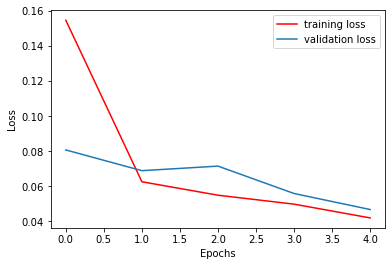

In [23]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate and Save Model

In [24]:
print(model.evaluate(test_data,test_target))

70/70 [==============================] - 21s 292ms/step - loss: 0.0375 - accuracy: 1.0000
[0.03745436295866966, 1.0]


In [25]:
model.save('facemask-detection-model.h5')